# Spitzer Image Download Package

## Imported Packages

In [1]:
# utilities
import os, glob
from pprint import pprint
from shutil import copyfile, rmtree

# standard packages
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

# astropy and astroquery
from astroquery import sha
from astropy import coordinates as coord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

/home/murphyj/anaconda3/lib/python3.6/site-packages/astroquery/sha/__init__.py:14: UserWarning: Experimental: SHA has not yet been refactored to have its API match the rest of astroquery.
  warnings.warn("Experimental: SHA has not yet been refactored to have its "


## SNR target list

In [2]:
# Loads csv file
line = np.genfromtxt(open('/home/murphyj/Desktop/Coding/SNR_list.csv', "r"), names=True, delimiter=',', dtype=None)

/home/murphyj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [3]:
# Defines Columns as lists
MCSNR = []#0
RA = []#1
DE = []#2
Rad = []#8
kT = []#12
VShock = []#16
Age = []#18
LX = []#4
LIR = []#7

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][0]
    MCSNR.append(name)
MCSNR = np.asarray(MCSNR)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][1]
    RA.append(name)
RA = np.asarray(RA)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][2]
    DE.append(name)
DE = np.asarray(DE)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][8]
    Rad.append(name)
Rad = np.asarray(Rad)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][12]
    kT.append(name)
kT = np.asarray(kT)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][17]
    VShock.append(name)
VShock = np.asarray(VShock)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][20]
    Age.append(name)
Age = np.asarray(Age)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][4]
    LX.append(name)
LX = np.asarray(LX)

num = line.shape[0]
for n in range(num):
    #print(l)
    name = line[n][7]
    LIR.append(name)
LIR = np.asarray(LIR)

In [4]:
# Changes Ra and Dec to readable strings
# Decodes bytes to strings
x = [Ra.decode('UTF-8') for Ra in RA]
y = [Dec.decode('UTF-8') for Dec in DE]

# Creates Ra and Dec formats from data
im_ra = []
im_ra_deg = []
for n in range(num):
    things = x[n].split()
    Ra = things[0]+'h'+things[1]+'m'+things[2]+'s'
    im_ra.append(Ra)
#print(im_ra[0])

im_dec = []
im_dec_deg = []
for n in range(num):
    things = y[n].split()
    Dec = things[0]+'d'+things[1]+'m'+things[2]+'s'
    im_dec.append(Dec)
#print(im_dec[0])

In [5]:
# Defines image sizes
im_size_as = Rad * 2
im_size_deg = im_size_as / 3600
im_size_am = im_size_as / 60
im_size = im_size_am*u.arcmin
im_pixels = 1024

In [6]:
# Target for testing
# User 
SNR = 34 # position in list
instrument_list = ['IRAC', 'MIPS']
band_list = [3.6, 4.5, 5.8, 8.0, 24, 70, 160]

sensor = instrument_list[0]
wavelength = band_list[3]

In [7]:
a = Angle(im_ra[SNR], u.hour)
im_ra_deg = a.degree

b = Angle(im_dec[SNR])
im_dec_deg = b.degree

test_src_coord = [im_ra_deg, im_dec_deg]

## Query Spitzer Heritage Archive

In [8]:
my_query = sha.query(coord=coord.SkyCoord(ra=test_src_coord[0], dec=test_src_coord[1],
                                          unit=(u.degree, u.degree)), size=0.001)

In [9]:
print(my_query.columns)

<TableColumns names=('reqkey','modedisplayname','wavelength','cra','cdec','filetype','externalname','ptcomment','ra','dec','epoch','equinox','begintime','endtime','minwavelength','maxwavelength','pbcdid','filesize','campid','ra1','dec1','ra2','dec2','ra3','dec3','ra4','dec4','naxis1','naxis2','cdelt1','cdelt2','crota2','crpix1','crpix2','crval1','crval2','ctype1','ctype2','heritagefilename','hasAccess','accessUrl','accessWithAnc1Url')>


In [10]:
my_query['modedisplayname', 'wavelength', 'filetype', 'filesize', 'ptcomment'].pprint(max_lines=100, max_width=-1) 
#stuff = my_query['modedisplayname', 'wavelength', 'filetype', 'filesize', 'ptcomment']
#thing = stuff['wavelength']
#name = thing[1]

modedisplayname   wavelength  filetype  filesize                        ptcomment                        
---------------- ----------- --------- --------- --------------------------------------------------------
 IRAC Map         IRAC 8.0um  Image    234290880  Mosaic image (long frametime if data taken in HDR mode)
 MIPS Scan        MIPS 70um   Image     10128960  Mosaic image                                           
 MIPS Scan        MIPS 70um   Image     10131840  Mosaic image                                           
 MIPS Scan        MIPS 70um   Image     10146240  Mosaic image                                           
 IRAC Map         IRAC 4.5um  Image    234290880  Mosaic image (long frametime if data taken in HDR mode)
 IRAC Map         IRAC 4.5um  Image     41855040  Mosaic image (long frametime if data taken in HDR mode)
 IRAC Map         IRAC 5.8um  Image     41855040  Mosaic image (long frametime if data taken in HDR mode)
 MIPS Scan        MIPS 160um  Image       3888

In [11]:
#name = str(sens) + ' ' + str(wavelength) + 'um'
#print(len(name))
#print(name)
#name_l=len(name)+1
#name=name.ljust(name_l)
#print(len(name))
#print(name)

In [12]:
sensor_l=len(sensor)+1
sens=sensor.rjust(sensor_l)
name = str(sens) + ' ' + str(wavelength) + 'um'
if sensor == 'MIPS':
    name_l=len(name)+1
    name=name.ljust(name_l)
print(name)
mask = (my_query['wavelength'] == name)
if sensor == 'IRAC':
    filesize_mask = (my_query['filesize'] > 2.e8)  # keep only files >200MB (i.e., SAGE images)
    combined_mask = np.logical_and(mask, filesize_mask)
else:
    combined_mask = mask

tbl = my_query[combined_mask]

tbl['modedisplayname', 'wavelength', 'filetype', 'filesize', 'ptcomment'].pprint(max_lines=100, max_width=-1) 

 IRAC 8.0um
modedisplayname   wavelength  filetype  filesize                        ptcomment                        
---------------- ----------- --------- --------- --------------------------------------------------------
 IRAC Map         IRAC 8.0um  Image    234290880  Mosaic image (long frametime if data taken in HDR mode)
 IRAC Map         IRAC 8.0um  Image    234288000  Mosaic image (long frametime if data taken in HDR mode)


In [13]:
nimages = len(tbl)
distance_check = np.zeros(nimages)

In [14]:
if sensor == 'IRAC':
    for n, row in enumerate(tbl):
        im_ra = row['ra']
        im_dec = row['dec']

        # determine the angular separation between the image centre and SNR
        snr = SkyCoord(test_src_coord[0] * u.degree, test_src_coord[1] * u.degree, frame='icrs')
        im_centre = coord.SkyCoord(im_ra * u.degree, im_dec * u.degree, frame='icrs')
        sep = snr.separation(im_centre)
        distance_check[n] = sep.value

    closest = np.argmin(distance_check)
    my_final_row = tbl[closest]
    print(my_final_row['modedisplayname', 'wavelength', 'filetype', 'filesize', 'ptcomment'])
    print("\n")
    print("Getting: {}".format(my_final_row['accessUrl']))
    url = my_final_row['accessUrl'].strip()
    sha.save_file(url, out_dir='test_files' + '_'+ str(wavelength) + '/')
elif sensor == 'MIPS':
    for u in tbl['accessUrl']:
        print("Getting: {}".format(u))
        url = u.strip()
        sha.save_file(url, out_dir='test_files' + '_'+ str(wavelength) + '/')

modedisplayname   wavelength  filetype  filesize                        ptcomment                        
---------------- ----------- --------- --------- --------------------------------------------------------
 IRAC Map         IRAC 8.0um  Image    234290880  Mosaic image (long frametime if data taken in HDR mode)


Getting:  http://sha.ipac.caltech.edu/applications/Spitzer/SHA/servlet/ProductDownload?DATASET=level2&ID=8691779    


In [15]:
print(test_src_coord)

[82.02083333333333, -67.45555555555556]


In [16]:
# impliment cuts
# load the files to list and get number
my_image_files = glob.glob(os.path.join('test_files_' + str(wavelength), '*.fits'))
n_images = len(my_image_files)
counter = 0
filename = sens[1:]+'_'+str(wavelength)+'.fits'
array = []
# cycle through and cut images
for i in my_image_files:
    with fits.open(i) as hdulist:
        header = hdulist[0].header
        if sensor == 'MIPS':
            if header['OBJECT'] != 'LMC' or header['OBSRVR'] != 'Margaret Meixner':
                if os.path.exists(os.path.join(my_image_files[counter])):
                    os.remove(os.path.join(my_image_files[counter]))
                #i = i-1

            #val1 = test_src_coord[0] - header['CRVAL1']
            #val2 = test_src_coord[1] - header['CRVAL2']
            #if val1 < 0:
            #    val1 = -val1
            #if val2 < 0:
            #    val2 = -val2
            #valt = val1 + val2
            #array.append(valt)
        
            #counter = counter + 1

for i in range(len(my_image_files)):
    if not os.path.exists(os.path.join(MCSNR[SNR])):
        os.makedirs(os.path.join(MCSNR[SNR]))
    if os.path.exists(os.path.join(my_image_files[i])):
        copyfile(os.path.join(my_image_files[i]), os.path.join((MCSNR[SNR].decode("utf-8")) + '/' + filename))
    

#for i in range(len(array)):
#    if array[i] == min(array):
#        if not os.path.exists(os.path.join(MCSNR[SNR])):
#            os.makedirs(os.path.join(MCSNR[SNR]))
#        copyfile(os.path.join(my_image_files[i]), os.path.join((MCSNR[SNR].decode("utf-8")) + '/' + filename))
    
#pprint(header)
rmtree(os.path.join('test_files' + '_'+ str(wavelength) + '/'))

In [17]:
def plot_image(data, wcs, coords=None):
    """
    convience function to plot data on a wcs projection
    
    Input:
    data -    the data array
    wcs -     the WCS object
    coords -  the coordinates of the object for plotting (1x2 array, optional)
    """
    # set up the plot
    fig, axs = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': wcs})
    
    # set up limits of the colour scale for plotting
    vmin = 1e-2

    # plot
    axs.imshow(data, cmap='jet', interpolation='nearest', origin='lower', norm=LogNorm(vmin=vmin))
    axs.scatter(coords[0], coords[1], transform=axs.get_transform('fk5'), s=300, lw=3,
                edgecolor='white', facecolor='none')
    axs.set_facecolor('black')
    axs.coords.grid(True, color='white', ls='dotted')
    axs.coords[0].set_axislabel('Right Ascension (J2000)')
    axs.coords[1].set_axislabel('Declination (J2000)')

    # display the plot
    plt.tight_layout()
    plt.show()

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / -32 = 4-BYTE FLOAT, 16 = 2-BYTE INTEGER        
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 8120 / Axis 1 size                                    
NAXIS2  =                 7213 / Axis 2 size                                    
EXTEND  =                    T / TAPE MAY HAVE STANDARD FITS EXTENSIONS         
ORIGIN  = 'Spitzer Science Center' / Organization generating this FITS file     
CREATOR = 'S18.25.0'           / SW version used to create this FITS file       
TELESCOP= 'Spitzer '           / Spitzer Space Telescope                        
INSTRUME= 'IRAC    '           / Spitzer Space Telescope instrument ID          
CHNLNUM =                    4 / 1 digit instrument channel number              
AOT_TYPE= 'IracMap '           / Observation Template Type                      
AORLABEL= 'IRAC-map2-0304'  

/home/murphyj/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/home/murphyj/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


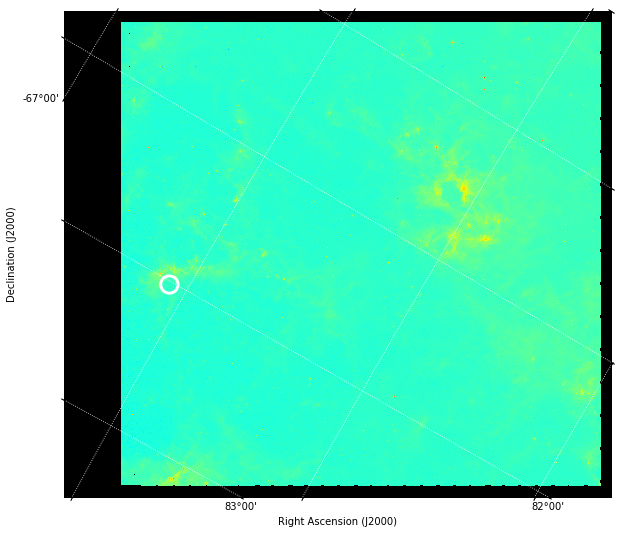

In [18]:
# load the files to list and get number
my_image_files = glob.glob(os.path.join(MCSNR[SNR].decode("utf-8"), '*.fits'))
n_images = len(my_image_files)

# cycle through images
for i in my_image_files:
    
    # load the file data, header, and wcs
    with fits.open(i) as hdulist:
        header = hdulist[0].header
        data = hdulist[0].data
        wcs = WCS(header)
        pprint(header)
        plot_image(data, wcs, coords=test_src_coord)